### Librerías

In [1]:
from __future__ import division
import warnings
import time
import pandas as pd
import math
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import random
from collections import Counter
from tqdm import tqdm
from random import randrange
import sys
import seaborn as sns
from sklearn.utils import check_array
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.utils.extmath import row_norms,safe_sparse_dot
from sklearn.cluster import AgglomerativeClustering
from itertools import permutations
%matplotlib inline

## Metodología

### Recolectar

### Lectura de la base de datos

In [2]:
df = pd.read_csv('heart_2020_cleaned.csv')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


#### Subsampling

In [3]:
df_sub = df.sample(frac = 0.05)
df_sub = df_sub.sort_index()
df_sub

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
14,No,29.29,Yes,No,No,0.0,30.0,Yes,Female,60-64,White,No,No,Good,5.0,No,No,No
16,No,26.26,No,No,No,5.0,2.0,No,Female,70-74,White,No,No,Very good,10.0,No,No,No
26,No,34.34,Yes,No,No,21.0,8.0,Yes,Female,65-69,White,No,Yes,Fair,9.0,No,No,No
36,No,24.62,No,No,No,5.0,0.0,No,Female,80 or older,White,No,Yes,Good,6.0,No,No,No
61,No,21.03,No,No,No,1.0,0.0,No,Female,80 or older,White,No,Yes,Excellent,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319716,No,34.01,No,No,No,0.0,0.0,No,Female,65-69,Hispanic,No,Yes,Very good,7.0,Yes,No,No
319722,No,28.19,No,No,No,0.0,0.0,No,Female,30-34,Hispanic,No,Yes,Very good,7.0,No,No,No
319729,No,41.01,No,No,No,1.0,0.0,No,Female,40-44,Hispanic,No,No,Good,7.0,No,No,No
319737,No,22.08,No,No,No,0.0,0.0,No,Female,55-59,Hispanic,No,Yes,Excellent,6.0,No,No,No


### Preparar

#### Convertir las caracteristicas linguisticas a valores categoricos

In [4]:
datos = df_sub.copy()
datos =  datos[datos.columns].replace({'Male':0, 'Female':1})
datos =  datos[datos.columns].replace({'Excellent':4, 'Fair':1, 'Good':2,'Poor':0, 'Very good':3})
datos =  datos[datos.columns].replace({'American Indian/Alaskan Native':1, 'Asian':2, 'Black':3,'Hispanic':4, 'Other':5, 'White':6 })
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
datos['AgeCategory'] = datos['AgeCategory'].apply(lambda x: encode_AgeCategory[x])
datos['AgeCategory'] = datos['AgeCategory'].astype('float')

encode_Diabetic = {'Yes':1, 'No':0, 'No, borderline diabetes':2,'Yes (during pregnancy)':3}
datos['Diabetic'] = datos['Diabetic'].apply(lambda x: encode_Diabetic[x])
datos['Diabetic'] = datos['Diabetic'].astype('float')

encode = {'Yes':1, 'No':0}
datos['Smoking'] = datos['Smoking'].apply(lambda x: encode[x])
datos['Smoking'] = datos['Smoking'].astype('float')

datos['AlcoholDrinking'] = datos['AlcoholDrinking'].apply(lambda x: encode[x])
datos['AlcoholDrinking'] = datos['AlcoholDrinking'].astype('float')

datos['Stroke'] = datos['Stroke'].apply(lambda x: encode[x])
datos['Stroke'] = datos['Stroke'].astype('float')

datos['DiffWalking'] = datos['DiffWalking'].apply(lambda x: encode[x])
datos['DiffWalking'] = datos['DiffWalking'].astype('float')

datos['PhysicalActivity'] = datos['PhysicalActivity'].apply(lambda x: encode[x])
datos['PhysicalActivity'] = datos['PhysicalActivity'].astype('float')

datos['Asthma'] = datos['Asthma'].apply(lambda x: encode[x])
datos['Asthma'] = datos['Asthma'].astype('float')

datos['KidneyDisease'] = datos['KidneyDisease'].apply(lambda x: encode[x])
datos['KidneyDisease'] = datos['KidneyDisease'].astype('float')

datos['SkinCancer'] = datos['SkinCancer'].apply(lambda x: encode[x])
datos['SkinCancer'] = datos['SkinCancer'].astype('float')

datos

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
14,No,29.29,1.0,0.0,0.0,0.0,30.0,1.0,1,62.0,6,0.0,0.0,2,5.0,0.0,0.0,0.0
16,No,26.26,0.0,0.0,0.0,5.0,2.0,0.0,1,72.0,6,0.0,0.0,3,10.0,0.0,0.0,0.0
26,No,34.34,1.0,0.0,0.0,21.0,8.0,1.0,1,67.0,6,0.0,1.0,1,9.0,0.0,0.0,0.0
36,No,24.62,0.0,0.0,0.0,5.0,0.0,0.0,1,80.0,6,0.0,1.0,2,6.0,0.0,0.0,0.0
61,No,21.03,0.0,0.0,0.0,1.0,0.0,0.0,1,80.0,6,0.0,1.0,4,8.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319716,No,34.01,0.0,0.0,0.0,0.0,0.0,0.0,1,67.0,4,0.0,1.0,3,7.0,1.0,0.0,0.0
319722,No,28.19,0.0,0.0,0.0,0.0,0.0,0.0,1,32.0,4,0.0,1.0,3,7.0,0.0,0.0,0.0
319729,No,41.01,0.0,0.0,0.0,1.0,0.0,0.0,1,42.0,4,0.0,0.0,2,7.0,0.0,0.0,0.0
319737,No,22.08,0.0,0.0,0.0,0.0,0.0,0.0,1,57.0,4,0.0,1.0,4,6.0,0.0,0.0,0.0


#### Comprobar la no existencia de datos faltantes

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15990 entries, 14 to 319743
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      15990 non-null  object 
 1   BMI               15990 non-null  float64
 2   Smoking           15990 non-null  float64
 3   AlcoholDrinking   15990 non-null  float64
 4   Stroke            15990 non-null  float64
 5   PhysicalHealth    15990 non-null  float64
 6   MentalHealth      15990 non-null  float64
 7   DiffWalking       15990 non-null  float64
 8   Sex               15990 non-null  int64  
 9   AgeCategory       15990 non-null  float64
 10  Race              15990 non-null  int64  
 11  Diabetic          15990 non-null  float64
 12  PhysicalActivity  15990 non-null  float64
 13  GenHealth         15990 non-null  int64  
 14  SleepTime         15990 non-null  float64
 15  Asthma            15990 non-null  float64
 16  KidneyDisease     15990 non-null  floa

In [6]:
datos['GenHealth']=datos['GenHealth'].astype('float64')

In [7]:
datos.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [8]:
def valores_faltantes(dataset):
    missing_values_count = dataset.isnull().sum()
    total_missing = missing_values_count.sum() 
    #Porcentaje de datos faltantes
    total_missing_porcent = total_missing/(np.product(dataset.shape))*100
    print('Porcentaje total de valores faltantes:',total_missing_porcent,'%')
    print('')
    print('Porcentaje de valores faltantes de cada atributo:')
    for col in dataset.columns:
        VP_missing = np.mean(dataset[col].isnull())
        print('{} - {}%'.format(col,round(VP_missing*100)))  

In [9]:
valores_faltantes(datos)

Porcentaje total de valores faltantes: 0.0 %

Porcentaje de valores faltantes de cada atributo:
HeartDisease - 0%
BMI - 0%
Smoking - 0%
AlcoholDrinking - 0%
Stroke - 0%
PhysicalHealth - 0%
MentalHealth - 0%
DiffWalking - 0%
Sex - 0%
AgeCategory - 0%
Race - 0%
Diabetic - 0%
PhysicalActivity - 0%
GenHealth - 0%
SleepTime - 0%
Asthma - 0%
KidneyDisease - 0%
SkinCancer - 0%


#### Identificación de outliers

<AxesSubplot:>

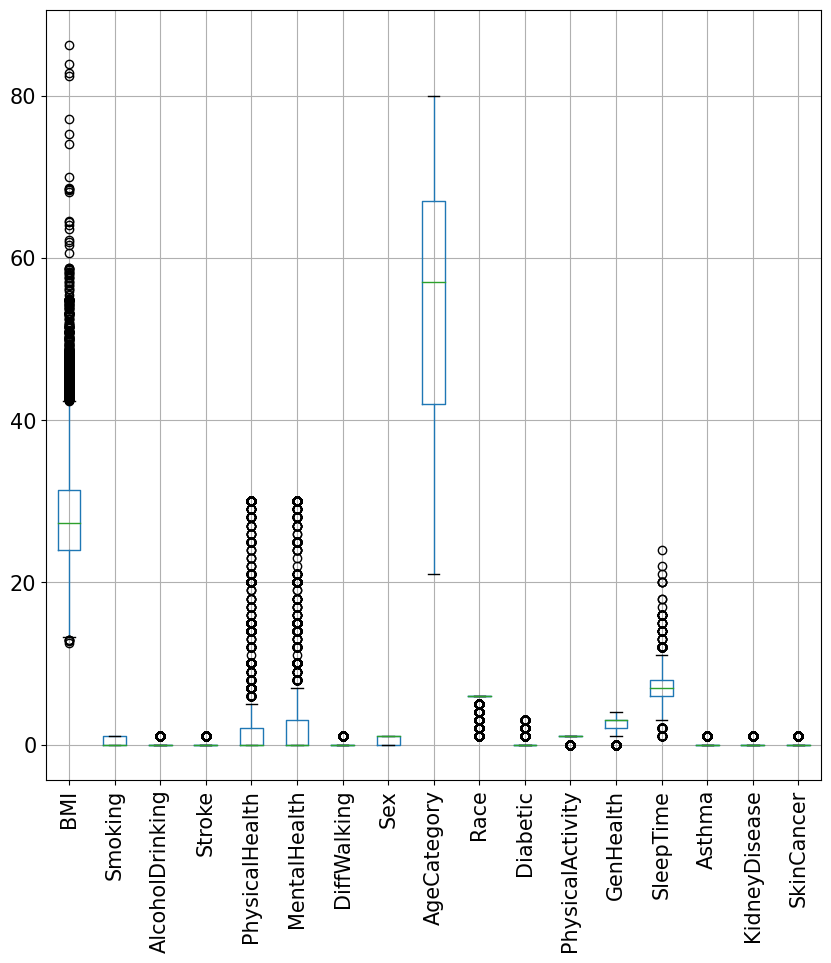

In [10]:
datos.boxplot(rot=90, fontsize=15,figsize = (10,10))

#### Normalización de los datos

In [11]:
def norm_min_max(datos):
    lim_sup = []
    lim_inf = []
    rangoDatos =[]
    maxNorm = 1
    minNorm = 0
    rango = maxNorm - minNorm
    for i in range (0,datos.columns.size):
        lim_sup.append(datos.iloc[:,i].max())
        lim_inf.append(datos.iloc[:,i].min())
        rangoDatos.append(lim_sup[i] - lim_inf[i])
    nombres = datos.columns.values.tolist()
    datosNorm = pd.DataFrame(columns = nombres)

    for j in range(len(datos.columns)):
        varNorm = []
        var = datos.iloc[:,j]
        for i in range(len(datos)):
            D = var[i] - lim_inf[j]
            DPct = D/rangoDatos[j]
            dNorm = rango*DPct
            varNorm.append(minNorm+dNorm)
        datosNorm.iloc[:,j] = varNorm
    datos = datosNorm
    return datos

In [12]:
d =pd.DataFrame(datos)
d = d.reset_index()
d = d.drop(['index'],axis=1) #Eliminando el atributo de decisión 
d

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,29.29,1.0,0.0,0.0,0.0,30.0,1.0,1,62.0,6,0.0,0.0,2.0,5.0,0.0,0.0,0.0
1,No,26.26,0.0,0.0,0.0,5.0,2.0,0.0,1,72.0,6,0.0,0.0,3.0,10.0,0.0,0.0,0.0
2,No,34.34,1.0,0.0,0.0,21.0,8.0,1.0,1,67.0,6,0.0,1.0,1.0,9.0,0.0,0.0,0.0
3,No,24.62,0.0,0.0,0.0,5.0,0.0,0.0,1,80.0,6,0.0,1.0,2.0,6.0,0.0,0.0,0.0
4,No,21.03,0.0,0.0,0.0,1.0,0.0,0.0,1,80.0,6,0.0,1.0,4.0,8.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15985,No,34.01,0.0,0.0,0.0,0.0,0.0,0.0,1,67.0,4,0.0,1.0,3.0,7.0,1.0,0.0,0.0
15986,No,28.19,0.0,0.0,0.0,0.0,0.0,0.0,1,32.0,4,0.0,1.0,3.0,7.0,0.0,0.0,0.0
15987,No,41.01,0.0,0.0,0.0,1.0,0.0,0.0,1,42.0,4,0.0,0.0,2.0,7.0,0.0,0.0,0.0
15988,No,22.08,0.0,0.0,0.0,0.0,0.0,0.0,1,57.0,4,0.0,1.0,4.0,6.0,0.0,0.0,0.0


In [13]:
d_S = d.loc[:,['BMI','PhysicalHealth','MentalHealth','AgeCategory','Race','Diabetic','GenHealth','SleepTime']]
CD_S = d.loc[:,['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','PhysicalActivity','Asthma','KidneyDisease','SkinCancer']]
datos_norm = norm_min_max(d_S)
datos_norm = pd.concat([datos_norm, CD_S], axis=1)
datos_norm

C:\Users\gaby9\AppData\Local\Temp\ipykernel_25964\1809094097.py:23: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  datosNorm.iloc[:,j] = varNorm


,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,Diabetic,GenHealth,SleepTime,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,0.227100,0.000000,1.000000,0.694915,1.0,0.0,0.50,0.173913,No,1.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0
1,0.186043,0.166667,0.066667,0.864407,1.0,0.0,0.75,0.391304,No,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0
2,0.295528,0.700000,0.266667,0.779661,1.0,0.0,0.25,0.347826,No,1.0,0.0,0.0,1.0,1,1.0,0.0,0.0,0.0
3,0.163821,0.166667,0.000000,1.000000,1.0,0.0,0.50,0.217391,No,0.0,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0
4,0.115176,0.033333,0.000000,1.000000,1.0,0.0,1.00,0.304348,No,0.0,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15985,0.291057,0.000000,0.000000,0.779661,0.6,0.0,0.75,0.260870,No,0.0,0.0,0.0,0.0,1,1.0,1.0,0.0,0.0
15986,0.212195,0.000000,0.000000,0.186441,0.6,0.0,0.75,0.260870,No,0.0,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0
15987,0.385908,0.033333,0.000000,0.355932,0.6,0.0,0.50,0.260870,No,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0
15988,0.129404,0.000000,0.000000,0.610169,0.6,0.0,1.00,0.217391,No,0.0,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0


### Analizar

#### Distribución de la información por atributo

In [14]:
datos_norm.describe()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,Diabetic,GenHealth,SleepTime,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
count,15990.000000,15990.000000,15990.000000,15990.000000,15990.000000,15990.000000,15990.000000,15990.000000,15990.000000,15990.000000,15990.000000,15990.000000,15990.000000,15990.000000,15990.000000,15990.000000,15990.000000
mean,0.214131,0.113173,0.129258,0.568373,0.880976,0.064540,0.647889,0.264192,0.407129,0.069481,0.038899,0.134209,0.525954,0.770419,0.132520,0.035397,0.092183
std,0.086648,0.265265,0.263913,0.298364,0.240253,0.165018,0.263240,0.062495,0.491315,0.254278,0.193361,0.340887,0.499342,0.420577,0.339066,0.184787,0.289293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.155827,0.000000,0.000000,0.355932,1.000000,0.000000,0.500000,0.217391,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.201084,0.000000,0.000000,0.610169,1.000000,0.000000,0.750000,0.260870,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.255420,0.066667,0.100000,0.779661,1.000000,0.000000,0.750000,0.304348,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


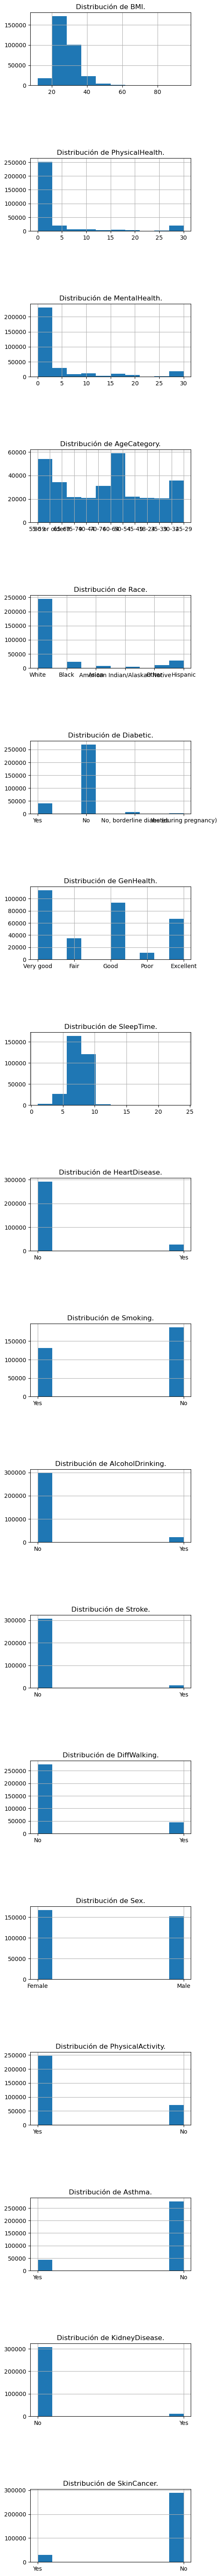

In [15]:
columnas = datos_norm.columns.values
fig, axs = plt.subplots(df.shape[1], 1, figsize = (5,80))
plt.subplots_adjust(hspace = 1)
for i, c in enumerate(columnas):
    dist_datos = df[c]
    axs[i].set_title(f'Distribución de {c}.')
    axs[i].hist(dist_datos)
    axs[i].grid(True)


#### Reducción de dimensionalidad (PCA)

In [16]:
def matriz_cov(data):
    atributos = data.columns 
    n = len(atributos)
    m = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            X = data[atributos[i]]
            Y = data[atributos[j]]
            m[i][j] = (((X-X.mean())*(Y-Y.mean())).sum())/(len(X)-1)
    return m

In [17]:
def PCA(datos,col_decision):
    datos1 = datos.drop([col_decision],axis=1) #Eliminando el atributo de decisión 
    #Ajustar los datos restando la media a cada atributo
    datos_A = pd.DataFrame(columns=datos1.columns,index=range(len(datos1)))
    for i in datos_A.columns:
        datos_A[i] = datos1[i] - datos1[i].mean()    
    #datos_A  
    matrix = matriz_cov(datos_A)  
    #sns.heatmap(matrix)  
    L,V =  np.linalg.eig(matrix)  
    #Obtener el porcentaje de covarianza de cada uno de los atributos
    total = L.sum()
    p = (L/total)*100
    pca =[]
    columnas1 = datos_A.columns.values
    for index, row in enumerate(p):
        print(columnas1[index] + ':',row)  

In [18]:
col_decision = 'HeartDisease'
PCA(datos_norm,col_decision)

BMI: 18.87785529113536
PhysicalHealth: 17.444269362945448
MentalHealth: 12.476991661243076
AgeCategory: 8.500910818331347
Race: 8.218444805404127
Diabetic: 6.378264860657941
GenHealth: 0.24775624271955324
SleepTime: 0.4424081901658234
Smoking: 4.802466020101479
AlcoholDrinking: 4.1589155920808745
Stroke: 1.6184880905608063
DiffWalking: 3.744036584753131
Sex: 3.5125906476468503
PhysicalActivity: 2.8652360996528565
Asthma: 2.36242754742063
KidneyDisease: 2.259306230109853
SkinCancer: 2.0896319550708324


In [19]:
datos_PCA = datos_norm.loc[:,['HeartDisease','BMI','PhysicalHealth','MentalHealth','AgeCategory','Race','Diabetic','Smoking','AlcoholDrinking','Stroke','DiffWalking','PhysicalActivity']]
datos_PCA

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,Diabetic,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity
0,No,0.227100,0.000000,1.000000,0.694915,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,No,0.186043,0.166667,0.066667,0.864407,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,No,0.295528,0.700000,0.266667,0.779661,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,No,0.163821,0.166667,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,No,0.115176,0.033333,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15985,No,0.291057,0.000000,0.000000,0.779661,0.6,0.0,0.0,0.0,0.0,0.0,1.0
15986,No,0.212195,0.000000,0.000000,0.186441,0.6,0.0,0.0,0.0,0.0,0.0,1.0
15987,No,0.385908,0.033333,0.000000,0.355932,0.6,0.0,0.0,0.0,0.0,0.0,0.0
15988,No,0.129404,0.000000,0.000000,0.610169,0.6,0.0,0.0,0.0,0.0,0.0,1.0


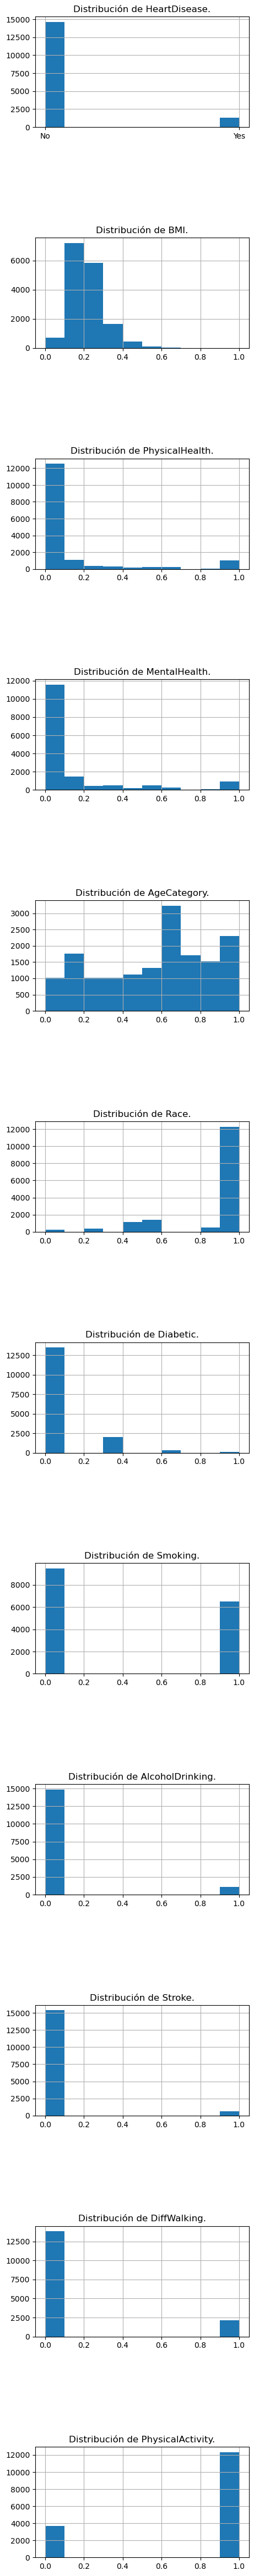

In [20]:
data_ = datos_PCA
columnas = data_.columns.values
fig, axs = plt.subplots(data_.shape[1], 1, figsize = (5,60))
plt.subplots_adjust(hspace = 1)
for i, c in enumerate(columnas):
    dist_datos = data_[c]
    axs[i].set_title(f'Distribución de {c}.')
    axs[i].hist(dist_datos)
    axs[i].grid(True)

In [21]:
#sns.pairplot(datos_PCA, hue='HeartDisease')

### Preparar

#### División de los conjuntos de entrenamiento y prueba

In [22]:
def method_8020(x,y):
    train_x = x[0 : int(len(x)*0.8)]
    train_y = y[0 : int(len(y)*0.8)]
    test_x = x[int(len(x)*0.8) : ]
    test_y = y[int(len(y)*0.8) : ]
    return train_x, train_y, test_x, test_y

In [23]:
dataset_x = datos_PCA.drop(['HeartDisease'],axis=1) #Eliminando el atributo de decisión 
dataset_y = datos_PCA['HeartDisease']

In [24]:
train_x, train_y, test_x, test_y = method_8020(dataset_x,dataset_y)

In [25]:
train_x

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,Diabetic,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity
0,0.227100,0.000000,1.000000,0.694915,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.186043,0.166667,0.066667,0.864407,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.295528,0.700000,0.266667,0.779661,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0.163821,0.166667,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.115176,0.033333,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12787,0.197696,0.000000,0.000000,0.271186,1.0,0.0,1.0,1.0,0.0,0.0,1.0
12788,0.188618,0.066667,0.000000,0.949153,1.0,0.0,0.0,0.0,0.0,0.0,1.0
12789,0.197696,0.000000,0.000000,0.779661,1.0,0.0,0.0,0.0,0.0,0.0,1.0
12790,0.301084,0.000000,0.000000,0.355932,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [26]:
test_x =pd.DataFrame(test_x)
test_x = test_x.reset_index()
test_x = test_x.drop(['index'],axis=1) #Eliminando el atributo de decisión 
test_x

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,Diabetic,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity
0,0.142005,0.233333,0.0,1.000000,1.0,0.000000,0.0,0.0,0.0,1.0,0.0
1,0.192818,0.666667,0.0,1.000000,1.0,0.333333,1.0,0.0,0.0,1.0,0.0
2,0.243767,0.000000,0.0,1.000000,1.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.190379,0.000000,0.0,1.000000,1.0,0.000000,1.0,0.0,0.0,0.0,1.0
4,0.155827,0.000000,0.0,0.271186,1.0,0.000000,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3193,0.291057,0.000000,0.0,0.779661,0.6,0.000000,0.0,0.0,0.0,0.0,1.0
3194,0.212195,0.000000,0.0,0.186441,0.6,0.000000,0.0,0.0,0.0,0.0,1.0
3195,0.385908,0.033333,0.0,0.355932,0.6,0.000000,0.0,0.0,0.0,0.0,0.0
3196,0.129404,0.000000,0.0,0.610169,0.6,0.000000,0.0,0.0,0.0,0.0,1.0


In [27]:
test_y =pd.DataFrame(test_y)
test_y = test_y.reset_index()
test_y = test_y.drop(['index'],axis=1) #Eliminando el atributo de decisión 
test_y

,HeartDisease
0,No
1,Yes
2,No
3,No
4,No
...,...
3193,No
3194,No
3195,No
3196,No


#### Preparación del conjunto de datos para el algoritmo de Kmeans

Text(0, 0.5, 'PhysicalHealth')

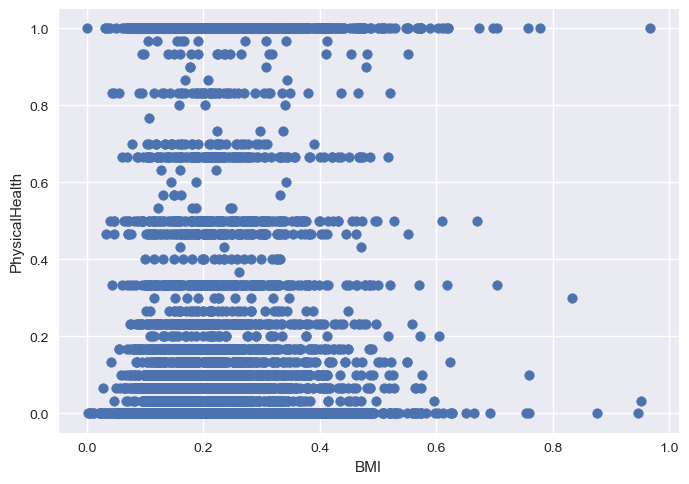

In [28]:
plt.style.use('seaborn')
plt.scatter(train_x['BMI'], train_x['PhysicalHealth'])
plt.xlabel('BMI')
plt.ylabel('PhysicalHealth')

In [29]:
#datos_k = datos.loc[:,['BMI','PhysicalHealth','HeartDisease']]
train_x_k = train_x.loc[:,['BMI','PhysicalHealth']]
train_x_k =pd.DataFrame(train_x_k)
#train_x_k = train_x_k.reset_index()
#train_x_k = train_x_k.drop(['index'],axis=1) #Eliminando el atributo de decisión 
train_x_k

,BMI,PhysicalHealth
0,0.227100,0.000000
1,0.186043,0.166667
2,0.295528,0.700000
3,0.163821,0.166667
4,0.115176,0.033333
...,...,...
12787,0.197696,0.000000
12788,0.188618,0.066667
12789,0.197696,0.000000
12790,0.301084,0.000000


In [30]:
#datos_k = datos.loc[:,['BMI','PhysicalHealth','HeartDisease']]
test_x_k = test_x.loc[:,['BMI','PhysicalHealth']]
test_x_k =pd.DataFrame(test_x_k)
#test_x_k = d_k.reset_index()
#test_x_k = test_x_k.drop(['index'],axis=1) #Eliminando el atributo de decisión 
test_x_k

,BMI,PhysicalHealth
0,0.142005,0.233333
1,0.192818,0.666667
2,0.243767,0.000000
3,0.190379,0.000000
4,0.155827,0.000000
...,...,...
3193,0.291057,0.000000
3194,0.212195,0.000000
3195,0.385908,0.033333
3196,0.129404,0.000000


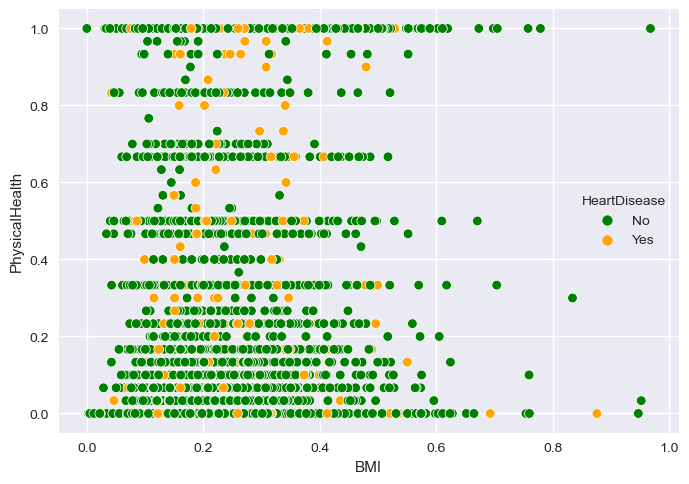

In [31]:
col_dec_train = pd.concat([train_y, train_x_k], axis=1)

plt.figure()
sns.scatterplot(x='BMI', y='PhysicalHealth', data=col_dec_train, hue=col_dec_train['HeartDisease'], palette=['green','orange'])
plt.xlabel('BMI')
plt.ylabel('PhysicalHealth')
plt.show()

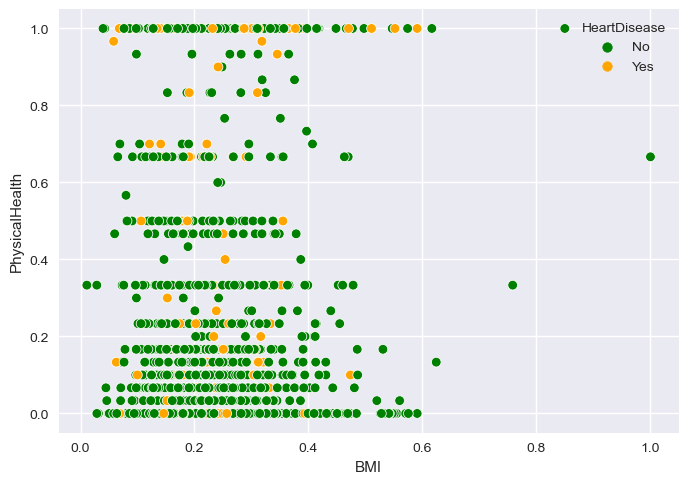

In [32]:
col_dec_test = pd.concat([test_y, test_x_k], axis=1)

plt.figure()
sns.scatterplot(x='BMI', y='PhysicalHealth', data=col_dec_test, hue=col_dec_test['HeartDisease'], palette=['green','orange'])
plt.xlabel('BMI')
plt.ylabel('PhysicalHealth')
plt.show()

In [33]:
def accuracy(y,predictions):
    y = np.array(y)
    allPermutations = np.array(list(permutations(np.unique(y))))
    acc = []
    for perm in allPermutations:
        classes = np.arange(0,y.shape[0])
        for index in range(classes.shape[0]):
            classes[index]=np.where(y[index]== perm)[0][0]
        acc.append(np.sum(classes==predictions))
    acc = np.array(acc)
    bestAccIndex = np.where(max(acc)==acc)[0][0]
    return dict(zip(np.arange(0,allPermutations.shape[1]),allPermutations[bestAccIndex])), acc[bestAccIndex]

### K-means ++

#### Entrenamiento

In [34]:
class KMeans_plus:
    def __init__(self, n_cluster=3):
        self.n_cluster = n_cluster
        #self.random_state = random_state

    def fit(self, dataset):
        self.x_data = dataset.iloc[:, 0]
        self.y_data = dataset.iloc[:, 1]        
        self.X = dataset.iloc[:, [0, 1]]  # not use feature labels
        self.m = self.X.shape[0]  # number of training examples
        self.n = self.X.shape[1]  # number of features.
        self.initial_centroids = []

        first_cen = self.get_random_centroid()
        initial_centroids = self.select_the_others_centroid(first_cen)

        self.plot_initial_centroids(initial_centroids)
        c = self.clustering(initial_centroids)
        return c


    def get_random_centroid(self):
        return np.random.randint(len(self.x_data))
        
    def select_the_others_centroid(self, first_cen):
        self.initial_centroids.append((self.x_data[first_cen], self.y_data[first_cen]))
        for i in range(self.n_cluster - 1):
            dis_max = 0
            index_max = 0
            for j in range(len(self.x_data)):
                if j != first_cen and (self.x_data[j], self.y_data[j]) not in self.initial_centroids:
                    dis_temp = 0
                    for k in self.initial_centroids:
                        pt1 = k
                        pt2 = (self.x_data[j], self.y_data[j])
                        dis_temp += self.euclidean_distance(pt1, pt2)
                    if dis_temp > dis_max:
                        dis_max = dis_temp
                        index_max = j
            self.initial_centroids.append((self.x_data[index_max], self.y_data[index_max]))    
        #print(self.initial_centroids)
        return np.array(self.initial_centroids)
        
    def plot_initial_centroids(self, initial_centroids):

        plt.scatter(self.X.iloc[:,0], self.X.iloc[:,1], c='#000000', s=7, label='Datos')
        plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], marker='*', s=120, c='r', label='Centroides Iniciales')
        plt.title('Algoritmo de K-Means++')
        plt.xlabel('Atributo 1')
        plt.ylabel('Atributo 2')
        plt.legend()
        plt.draw()

 
    def clustering(self, centroids):

        old_centroids = np.zeros(centroids.shape)
        stopping_criteria = 0.0001
        self.iterating_count = 0
        self.objective_func_values = []

        while self.euclidean_distance(old_centroids, centroids) >= stopping_criteria:
            clusters = np.zeros(len(self.X))
            C = []
            # Assigning each value to its closest cluster
            for i in range(self.m):
                distances = []
                for j in range(len(centroids)):
                    distances.append(self.euclidean_distance(self.X.iloc[i, :], centroids[j]))
                cluster = np.argmin(distances)
                clusters[i] = cluster

            # Storing the old centroid values to compare centroid moves
            old_centroids = centroids.copy()

            # Finding the new centroids
            for i in range(self.n_cluster):
                points = [self.X.iloc[j, :] for j in range(len(self.X)) if clusters[j] == i]
                centroids[i] = np.mean(points, axis=0)

            # calculate objective function value for current cluster centroids
            self.objective_func_values.append([self.iterating_count, self.objective_func_calculate(clusters, centroids)])
            self.plot_centroids(centroids, clusters)
            self.iterating_count += 1

        self.plot_objective_function_values()
        return centroids
    
    def predict(self, centroids,X):
        self.D = X.iloc[:, [0, 1]]  # not use feature labels
        self.b = self.D.shape[0]  # number of training examples
        clusters = np.zeros(len(self.D))
        C = []
        # Assigning each value to its closest cluster
        for i in range(self.b):
            distances = []
            for j in range(len(centroids)):
                distances.append(self.euclidean_distance(self.D.iloc[i, :], centroids[j]))
            cluster = np.argmin(distances)
            clusters[i] = cluster

        # calculate objective function value for current cluster centroids
        #C = self.plot_centroids(centroids, clusters)
        return clusters   
    
    def plot_centroids(self, centroids, clusters):
        colors = ["#4C72B0", "#DD8452", "#55A868", "#C44E52", "#8172B3",
          "#937860", "#DA8BC3", "#8C8C8C", "#CCB974", "#64B5CD"]
        fig, ax = plt.subplots()
        for i in range(self.n_cluster):
            points = np.array([self.X.iloc[j, :] for j in range(len(self.X)) if clusters[j] == i])
            ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i], label='Cluster {}'.format(i + 1))
        
        ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=120, c='#000000', label='Centroides')

        plt.title('Algoritmo de K-Means++\n( Número de Iteración = {} , Valor de la función objetivo = {:.2f} )'
                  .format((self.iterating_count + 1), np.array(self.objective_func_values)[self.iterating_count, 1]))
        plt.xlabel('Atributo 1')
        plt.ylabel('Atributo 2')
        plt.legend()
        plt.draw()
        
        #print('Clusters',clusters, ' Largo:',len(clusters))
        #print('')
        return clusters 

    def euclidean_distance(self, a, b):
        return np.sqrt(np.sum((np.array(a) - np.array(b))**2))

    def objective_func_calculate(self, clusters, centroids):
        """Calcular el valor de la función objetivo para los centroides actuales"""
        distances_from_centroids = []
        for i in range(self.n_cluster):
            points = np.array([self.X.iloc[j, :] for j in range(len(self.X)) if clusters[j] == i])
            for k in range(len(points)):
                distances_from_centroids.append(self.euclidean_distance(points[k, :], centroids[i]))
        return sum(distances_from_centroids)

    def plot_objective_function_values(self):
        """Esta función traza el gráfico del valor de la función objetivo para cada iteración """

        plt.figure()
        plt.plot((np.array(self.objective_func_values)[:, 0] + 1),  np.array(self.objective_func_values)[:, 1], 'bo')
        plt.plot((np.array(self.objective_func_values)[:, 0] + 1), np.array(self.objective_func_values)[:, 1], 'k')
        plt.title('Función objetivo')
        plt.xlabel('Número de Iteración')
        plt.ylabel('Valor')
        plt.draw()

Tiempo de Ejecución: 16.0804033279 segundos.


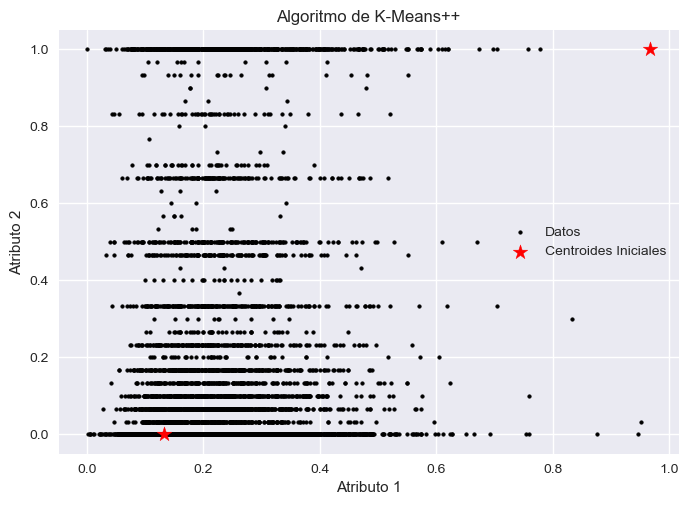

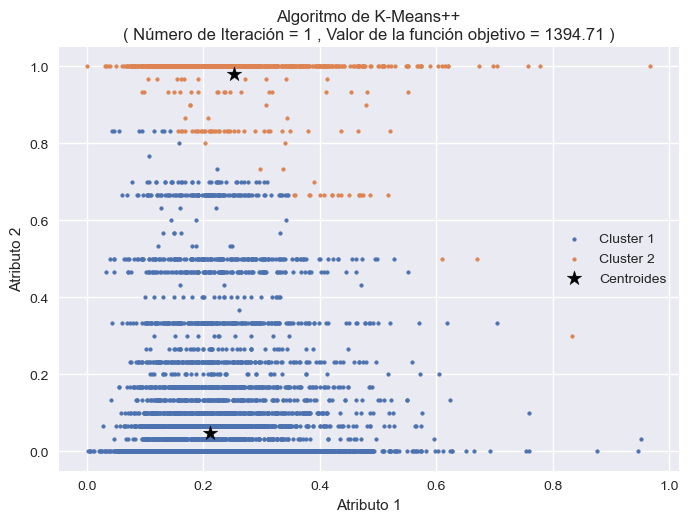

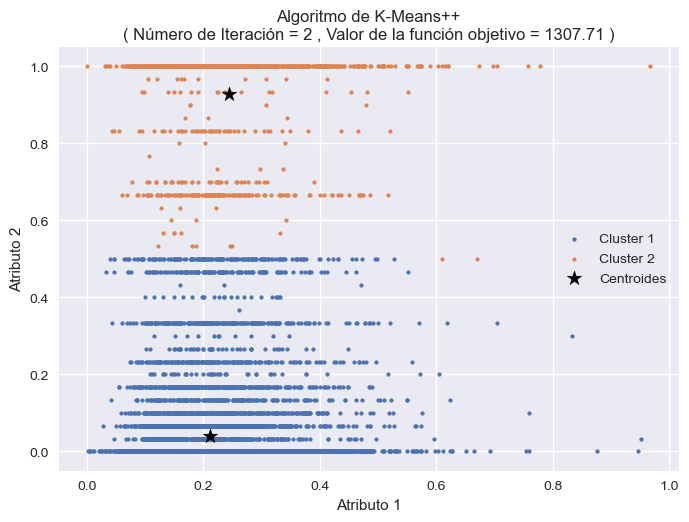

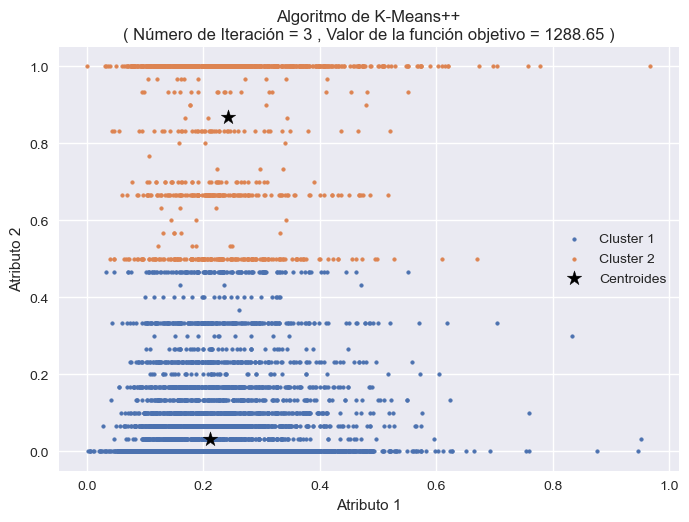

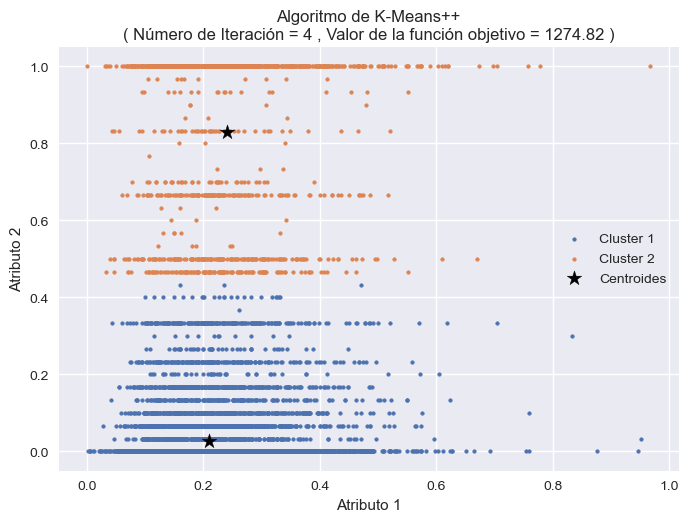

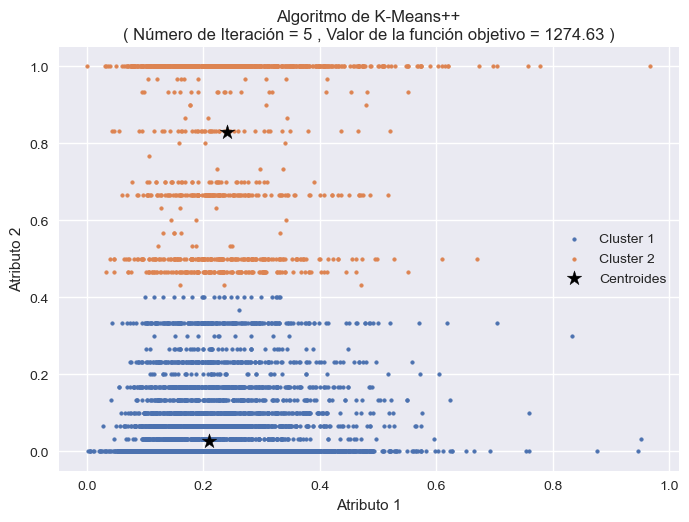

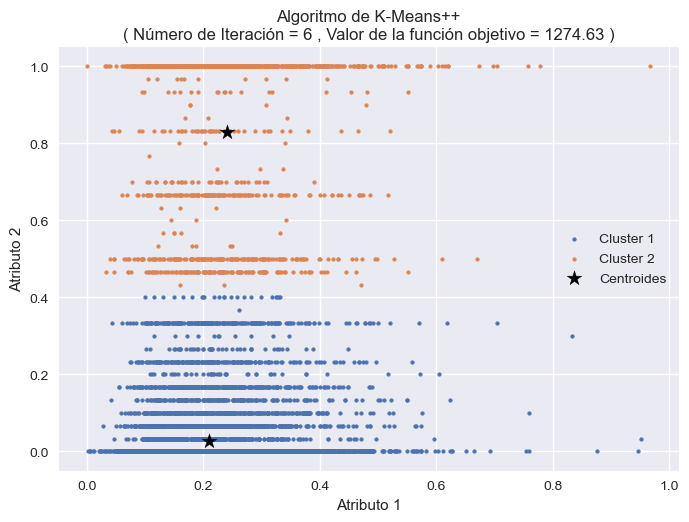

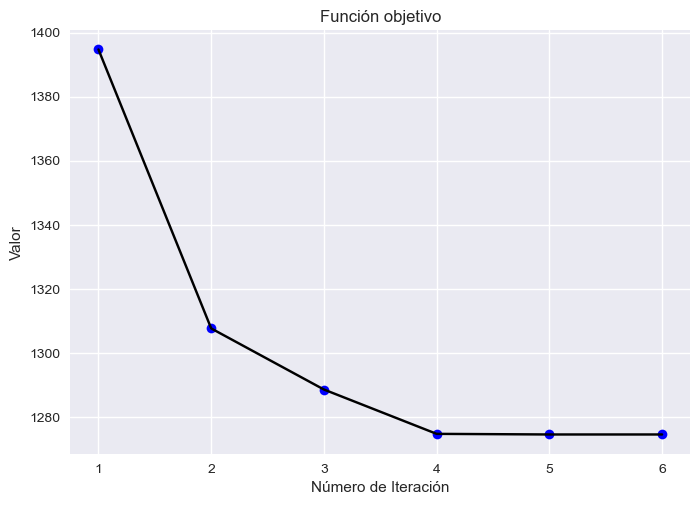

In [35]:
start_time = time.time()
kmeans2 = KMeans_plus(n_cluster=2)
centroids = kmeans2.fit(train_x_k)
elapsed_time = time.time() - start_time
print("Tiempo de Ejecución: %.10f segundos." % elapsed_time)

#### Prueba

In [36]:
L = kmeans2.predict(centroids,test_x_k)
print(L)

[0. 1. 0. ... 0. 0. 0.]


In [37]:
L.shape

(3198,)

In [38]:
Lb = pd.DataFrame(L)
dataset_kmeans = pd.concat([Lb, test_x_k], axis=1)
dataset_kmeans.set_axis(['Labels', 'BMI', 'PhysicalHealth'], 
                    axis='columns', inplace=True)
dataset_kmeans

C:\Users\gaby9\AppData\Local\Temp\ipykernel_25964\3605527194.py:3: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  dataset_kmeans.set_axis(['Labels', 'BMI', 'PhysicalHealth'],


,Labels,BMI,PhysicalHealth
0,0.0,0.142005,0.233333
1,1.0,0.192818,0.666667
2,0.0,0.243767,0.000000
3,0.0,0.190379,0.000000
4,0.0,0.155827,0.000000
...,...,...,...
3193,0.0,0.291057,0.000000
3194,0.0,0.212195,0.000000
3195,0.0,0.385908,0.033333
3196,0.0,0.129404,0.000000


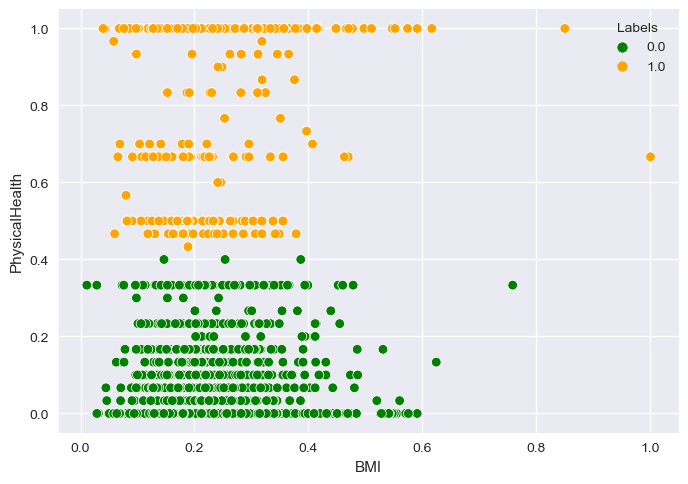

In [39]:
plt.figure()
sns.scatterplot(x='BMI', y='PhysicalHealth', data=dataset_kmeans, hue=dataset_kmeans['Labels'], palette=['green','orange'])
plt.xlabel('BMI')
plt.ylabel('PhysicalHealth')
plt.show()

In [40]:
classes_dict, acc = accuracy(test_y,L)
print('Orden de los grupos:', classes_dict)
print('Aciertos:',acc)
print('Porcentaje:',100*acc/test_y.shape[0],'%')

Orden de los grupos: {0: 'No', 1: 'Yes'}
Aciertos: 2734
Porcentaje: 85.49093183239525 %


### Birch

#### Entrenamiento

In [41]:
def split_node(node, threshold, branching_factor):
    """El nodo debe dividirse si no hay lugar para un nuevo subcluster en el nodo."""
    new_subcluster1 = CF_Subcluster()
    new_subcluster2 = CF_Subcluster()
    new_node1 = CF_Node(threshold=threshold,branching_factor=branching_factor,is_leaf=node.is_leaf,n_features=node.n_features)
    new_node2 = CF_Node(threshold=threshold,branching_factor=branching_factor,is_leaf=node.is_leaf,n_features=node.n_features)
    new_subcluster1.child = new_node1
    new_subcluster2.child = new_node2
    if node.is_leaf:
        if node.prev_leaf is not None:
            node.prev_leaf.next_leaf = new_node1
        new_node1.prev_leaf = node.prev_leaf
        new_node1.next_leaf = new_node2
        new_node2.prev_leaf = new_node1
        new_node2.next_leaf = node.next_leaf
        if node.next_leaf is not None:
            node.next_leaf.prev_leaf = new_node2
    dist = euclidean_distances(node.centroids,node.centroids,squared=True)
    #print('dist',dist)
    n_clusters = dist.shape[0]
    farthest_idx = np.unravel_index(dist.argmax(), (n_clusters, n_clusters))
    #print('farthest_idx',farthest_idx)
    node1_dist, node2_dist = dist[(farthest_idx,)]
    #print('node1_dist',node1_dist)
    #print('node2_dist',node2_dist)
    node1_closer = node1_dist < node2_dist
    for idx, subcluster in enumerate(node.subclusters):
        if node1_closer[idx]:
            new_node1.append_subcluster(subcluster)
            new_subcluster1.update(subcluster)
        else:
            new_node2.append_subcluster(subcluster)
            new_subcluster2.update(subcluster)
    return new_subcluster1, new_subcluster2

In [42]:
class CF_Subcluster:
    """Cada subcluster de un CFNode se denomina CFSubcluster."""
    def __init__(self, *, linear_sum=None):
        if linear_sum is None:
            self.n_samples = 0
            self.squared_sum = 0.0
            self.centroid = self.linear_sum = 0
        else:
            self.n_samples = 1
            self.centroid = self.linear_sum = linear_sum
            
            self.squared_sum = self.sq_norm = np.dot(self.linear_sum, self.linear_sum)
        self.child = None
    def update(self, subcluster):
        self.n_samples += subcluster.n_samples
        self.linear_sum += subcluster.linear_sum
        self.squared_sum += subcluster.squared_sum
        self.centroid = self.linear_sum / self.n_samples
        self.sq_norm = np.dot(self.centroid, self.centroid)
    def merge_subcluster(self, nominee_cluster, threshold):
        new_ss = self.squared_sum + nominee_cluster.squared_sum
        new_ls = self.linear_sum + nominee_cluster.linear_sum
        new_n = self.n_samples + nominee_cluster.n_samples
        new_centroid = (1 / new_n) * new_ls
        new_sq_norm = np.dot(new_centroid, new_centroid)
        sq_radius = new_ss / new_n - new_sq_norm
        if (sq_radius <= threshold ** 2):
            (self.n_samples,self.linear_sum,self.squared_sum,self.centroid,self.sq_norm,) = (new_n, new_ls, new_ss, new_centroid, new_sq_norm)
            return True
        return False

In [43]:
class CF_Node:
    """Cada nodo de un CFTree se denomina CFNode.
    El CFNode puede tener un máximo de branching_factor número de CFSubclusters.
    """
    def __init__(self, *, threshold, branching_factor, is_leaf, n_features):
        self.threshold = threshold
        self.branching_factor = branching_factor
        self.is_leaf = is_leaf
        self.n_features = n_features
        self.subclusters = []
        self.init_centroids = np.zeros((branching_factor + 1, n_features))
        self.init_sq_norm = np.zeros((branching_factor + 1))
        self.squared_norm = []
        self.prev_leaf = None
        self.next_leaf = None
    def append_subcluster(self, subcluster):
        n_samples = len(self.subclusters)
        self.subclusters.append(subcluster)
        self.init_centroids[n_samples] = subcluster.centroid
        self.init_sq_norm[n_samples] = subcluster.sq_norm
        self.centroids = self.init_centroids[:n_samples+1,:]
        self.squared_norm = self.init_sq_norm[:n_samples+1]
    def update_split_subclusters(self, subcluster, new_subcluster1, new_subcluster2):
        ind = self.subclusters.index(subcluster)
        self.subclusters[ind] = new_subcluster1
        self.init_centroids[ind] = new_subcluster1.centroid
        self.init_sq_norm[ind] = new_subcluster1.sq_norm
        self.append_subcluster(new_subcluster2)
    def insert_cf_subcluster(self, subcluster):
        if not self.subclusters:
            self.append_subcluster(subcluster)
            return False
        threshold = self.threshold
        branching_factor = self.branching_factor
        dist_matrix = np.dot(self.centroids, subcluster.centroid)
        dist_matrix *= -2.0
        dist_matrix += self.squared_norm
        closest_index = np.argmin(dist_matrix)
        closest_subcluster = self.subclusters[closest_index]
        if closest_subcluster.child is not None:
            split_child = closest_subcluster.child.insert_cf_subcluster(subcluster)
            if not split_child:
                closest_subcluster.update(subcluster)
                self.init_centroids[closest_index] = self.subclusters[closest_index].centroid
                self.init_sq_norm[closest_index] = self.subclusters[closest_index].sq_norm
                return False
            else:
                new_subcluster1, new_subcluster2 = split_node(closest_subcluster.child,threshold,branching_factor)
                self.update_split_subclusters(closest_subcluster,new_subcluster1,new_subcluster2)
                if len(self.subclusters) > self.branching_factor:
                    return True
                return False
        else:
            merged = closest_subcluster.merge_subcluster(subcluster, self.threshold)
            if merged:
                self.init_centroids[closest_index] = closest_subcluster.centroid
                self.init_sq_norm[closest_index] = closest_subcluster.sq_norm
                return False
            elif len(self.subclusters) < self.branching_factor:
                self.append_subcluster(subcluster)
                return False
            else:
                self.append_subcluster(subcluster)
                return True

In [44]:
class BIRCH:
    """Implementación del algoritmo de agrupación BIRCH."""
    def __init__(self,*,threshold=0.5,branching_factor=50,n_clusters=3,compute_labels=True,copy=True,):
        self.threshold = threshold
        self.branching_factor = branching_factor
        self.n_clusters = n_clusters
        self.compute_labels = compute_labels
        self.copy = copy
    def fit(self,X):
        """Construcción del árbol CF para los datos de entrada."""
        threshold = self.threshold
        branching_factor = self.branching_factor
        X = check_array(X, accept_sparse='csr', copy=True)
        n_samples, n_features = X.shape
        ##CF
        self.root = CF_Node(threshold=threshold,branching_factor=branching_factor,is_leaf=True,n_features=n_features)
        self.dummy_leaf = CF_Node(threshold=threshold,branching_factor=branching_factor,is_leaf=True,n_features=n_features)
        self.dummy_leaf.next_leaf = self.root
        self.root.prev_leaf = self.dummy_leaf
        iter_func = iter(X)
        for sample in iter_func:
            subcluster = CF_Subcluster(linear_sum=sample)
            split = self.root.insert_cf_subcluster(subcluster)
            if split:
                new_subcluster1, new_subcluster2 = split_node(self.root, threshold, branching_factor)
                del self.root
                self.root = CF_Node(threshold=threshold,branching_factor=branching_factor,is_leaf=False,n_features=n_features,)
                self.root.append_subcluster(new_subcluster1)
                self.root.append_subcluster(new_subcluster2)
        centroids = np.concatenate([leaf.centroids for leaf in self.get_leaves()])
        self.subcluster_centers = centroids
        self.global_clustering(X)
        return self
    def get_leaves(self):
        leaf_ptr = self.dummy_leaf.next_leaf
        leaves = []
        while leaf_ptr is not None:
            leaves.append(leaf_ptr)
            leaf_ptr = leaf_ptr.next_leaf
        return leaves
    def global_clustering(self, X):
        clusterer = self.n_clusters
        centroids = self.subcluster_centers
        compute_labels = (X is not None) and self.compute_labels
        
        if isinstance(clusterer, int):
            clusterer = AgglomerativeClustering(n_clusters=self.n_clusters)
        self.subcluster_norms = row_norms(self.subcluster_centers, squared=True)
        self.subcluster_labels = clusterer.fit_predict(self.subcluster_centers)
    def predict(self,X):
        dist = euclidean_distances(X,self.subcluster_centers,squared=True)
        argmin = np.argmin(dist,axis=1)
        return self.subcluster_labels[argmin]

####  threshold=0.5,branching_factor=50

In [45]:
start_time = time.time()
brc = BIRCH(threshold=0.5,branching_factor=50,n_clusters=2)
brc.fit(train_x)
elapsed_time = time.time() - start_time
print("Tiempo de Ejecución: %.10f segundos." % elapsed_time)

Tiempo de Ejecución: 0.1989953518 segundos.


#### Prueba

In [46]:
labels=brc.predict(test_x)
print(np.unique(labels))

[0 1]


In [47]:
L = pd.DataFrame(labels)
dataset_Birch = pd.concat([L, test_x], axis=1)
dataset_Birch.set_axis(['Labels', 'BMI', 'PhysicalHealth','MentalHealth','AgeCategory','Race','Diabetic','Smoking','AlcoholDrinking','Stroke','DiffWalking','PhysicalActivity'], 
                    axis='columns', inplace=True)
dataset_Birch

C:\Users\gaby9\AppData\Local\Temp\ipykernel_3124\1360341088.py:3: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  dataset_Birch.set_axis(['Labels', 'BMI', 'PhysicalHealth','MentalHealth','AgeCategory','Race','Diabetic','Smoking','AlcoholDrinking','Stroke','DiffWalking','PhysicalActivity'],


,Labels,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,Diabetic,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity
0,0,0.189534,0.000000,0.000000,0.864407,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0,0.213075,0.033333,0.033333,0.525424,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0,0.220723,0.000000,0.100000,0.186441,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,0.494077,0.000000,0.000000,0.779661,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0.258210,0.000000,0.000000,0.949153,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3193,0,0.182036,0.000000,0.000000,0.440678,0.6,0.0,1.0,0.0,0.0,0.0,0.0
3194,0,0.225521,0.000000,0.000000,0.186441,0.6,0.0,0.0,0.0,0.0,0.0,1.0
3195,0,0.180087,0.000000,0.000000,0.271186,0.6,0.0,0.0,1.0,0.0,0.0,1.0
3196,1,0.204978,0.000000,0.000000,0.694915,0.6,0.0,0.0,0.0,1.0,0.0,0.0


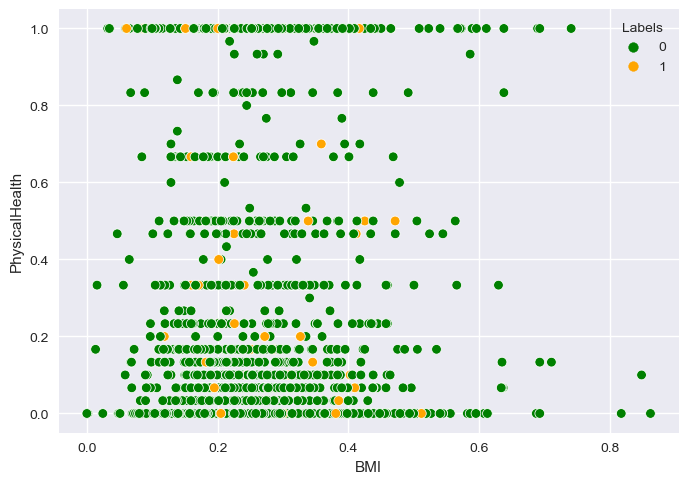

In [48]:
plt.figure()
sns.scatterplot(x='BMI', y='PhysicalHealth', data=dataset_Birch, hue=dataset_Birch['Labels'], palette=['green','orange'])
plt.xlabel('BMI')
plt.ylabel('PhysicalHealth')
plt.show()

In [49]:
classes_dict, acc = accuracy(test_y,labels)
print('Orden de los grupos:', classes_dict)
print('Aciertos:',acc)
print('Porcentaje:',100*acc/test_y.shape[0],'%')

Orden de los grupos: {0: 'No', 1: 'Yes'}
Aciertos: 2888
Porcentaje: 90.30644152595372 %


#### threshold=0.3,branching_factor=50

In [50]:
start_time = time.time()
brc = BIRCH(threshold=0.3,branching_factor=50,n_clusters=2)
brc.fit(train_x)
elapsed_time = time.time() - start_time
print("Tiempo de Ejecución: %.10f segundos." % elapsed_time)

Tiempo de Ejecución: 0.1825356483 segundos.


#### Prueba

In [51]:
labels=brc.predict(test_x)
print(np.unique(labels))

[0 1]


In [52]:
L = pd.DataFrame(labels)
dataset_Birch = pd.concat([L, test_x], axis=1)
dataset_Birch.set_axis(['Labels', 'BMI', 'PhysicalHealth','MentalHealth','AgeCategory','Race','Diabetic','Smoking','AlcoholDrinking','Stroke','DiffWalking','PhysicalActivity'], 
                    axis='columns', inplace=True)
dataset_Birch

C:\Users\gaby9\AppData\Local\Temp\ipykernel_3124\1360341088.py:3: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  dataset_Birch.set_axis(['Labels', 'BMI', 'PhysicalHealth','MentalHealth','AgeCategory','Race','Diabetic','Smoking','AlcoholDrinking','Stroke','DiffWalking','PhysicalActivity'],


,Labels,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,Diabetic,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity
0,0,0.189534,0.000000,0.000000,0.864407,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0,0.213075,0.033333,0.033333,0.525424,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0,0.220723,0.000000,0.100000,0.186441,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,0.494077,0.000000,0.000000,0.779661,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0.258210,0.000000,0.000000,0.949153,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3193,0,0.182036,0.000000,0.000000,0.440678,0.6,0.0,1.0,0.0,0.0,0.0,0.0
3194,0,0.225521,0.000000,0.000000,0.186441,0.6,0.0,0.0,0.0,0.0,0.0,1.0
3195,0,0.180087,0.000000,0.000000,0.271186,0.6,0.0,0.0,1.0,0.0,0.0,1.0
3196,1,0.204978,0.000000,0.000000,0.694915,0.6,0.0,0.0,0.0,1.0,0.0,0.0


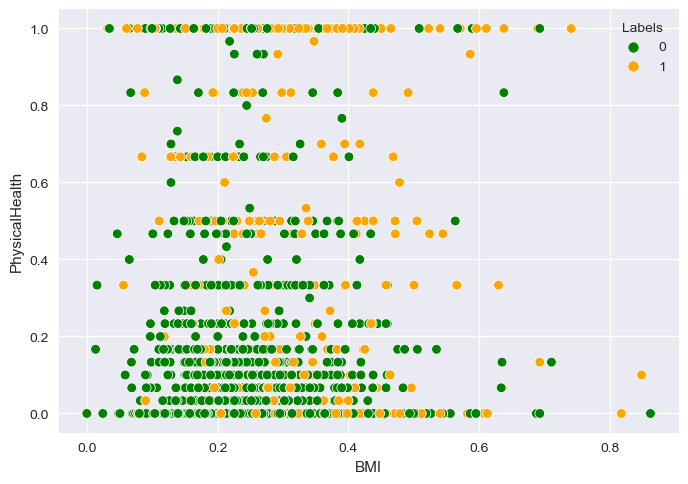

In [53]:
plt.figure()
sns.scatterplot(x='BMI', y='PhysicalHealth', data=dataset_Birch, hue=dataset_Birch['Labels'], palette=['green','orange'])
plt.xlabel('BMI')
plt.ylabel('PhysicalHealth')
plt.show()

In [54]:
classes_dict, acc = accuracy(test_y,labels)
print('Orden de los grupos:', classes_dict)
print('Aciertos:',acc)
print('Porcentaje:',100*acc/test_y.shape[0],'%')

Orden de los grupos: {0: 'No', 1: 'Yes'}
Aciertos: 2679
Porcentaje: 83.77110694183865 %


#### threshold=0.7,branching_factor=50

In [55]:
start_time = time.time()
brc = BIRCH(threshold=0.7,branching_factor=50,n_clusters=2)
brc.fit(train_x)
elapsed_time = time.time() - start_time
print("Tiempo de Ejecución: %.10f segundos." % elapsed_time)

Tiempo de Ejecución: 0.1653952599 segundos.


#### Prueba

In [56]:
labels=brc.predict(test_x)
print(np.unique(labels))

[0 1]


In [57]:
L = pd.DataFrame(labels)
dataset_Birch = pd.concat([L, test_x], axis=1)
dataset_Birch.set_axis(['Labels', 'BMI', 'PhysicalHealth','MentalHealth','AgeCategory','Race','Diabetic','Smoking','AlcoholDrinking','Stroke','DiffWalking','PhysicalActivity'], 
                    axis='columns', inplace=True)
dataset_Birch

C:\Users\gaby9\AppData\Local\Temp\ipykernel_3124\1360341088.py:3: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  dataset_Birch.set_axis(['Labels', 'BMI', 'PhysicalHealth','MentalHealth','AgeCategory','Race','Diabetic','Smoking','AlcoholDrinking','Stroke','DiffWalking','PhysicalActivity'],


,Labels,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,Diabetic,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity
0,0,0.189534,0.000000,0.000000,0.864407,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0,0.213075,0.033333,0.033333,0.525424,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0,0.220723,0.000000,0.100000,0.186441,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,0.494077,0.000000,0.000000,0.779661,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0.258210,0.000000,0.000000,0.949153,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3193,0,0.182036,0.000000,0.000000,0.440678,0.6,0.0,1.0,0.0,0.0,0.0,0.0
3194,0,0.225521,0.000000,0.000000,0.186441,0.6,0.0,0.0,0.0,0.0,0.0,1.0
3195,0,0.180087,0.000000,0.000000,0.271186,0.6,0.0,0.0,1.0,0.0,0.0,1.0
3196,1,0.204978,0.000000,0.000000,0.694915,0.6,0.0,0.0,0.0,1.0,0.0,0.0


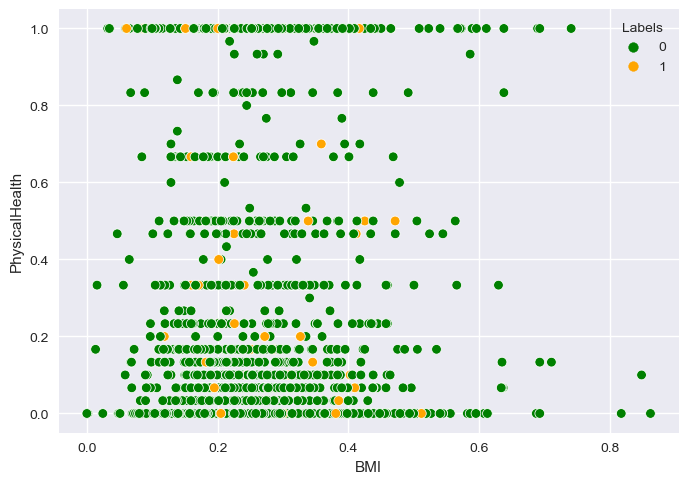

In [58]:
plt.figure()
sns.scatterplot(x='BMI', y='PhysicalHealth', data=dataset_Birch, hue=dataset_Birch['Labels'], palette=['green','orange'])
plt.xlabel('BMI')
plt.ylabel('PhysicalHealth')
plt.show()

In [59]:
classes_dict, acc = accuracy(test_y,labels)
print('Orden de los grupos:', classes_dict)
print('Aciertos:',acc)
print('Porcentaje:',100*acc/test_y.shape[0],'%')

Orden de los grupos: {0: 'No', 1: 'Yes'}
Aciertos: 2889
Porcentaje: 90.33771106941839 %


#### threshold=0.5,branching_factor=30

In [60]:
start_time = time.time()
brc = BIRCH(threshold=0.5,branching_factor=30,n_clusters=2)
brc.fit(train_x)
elapsed_time = time.time() - start_time
print("Tiempo de Ejecución: %.10f segundos." % elapsed_time)

Tiempo de Ejecución: 0.1809995174 segundos.


#### Prueba

In [61]:
labels=brc.predict(test_x)
print(np.unique(labels))

[0 1]


In [62]:
L = pd.DataFrame(labels)
dataset_Birch = pd.concat([L, test_x], axis=1)
dataset_Birch.set_axis(['Labels', 'BMI', 'PhysicalHealth','MentalHealth','AgeCategory','Race','Diabetic','Smoking','AlcoholDrinking','Stroke','DiffWalking','PhysicalActivity'], 
                    axis='columns', inplace=True)
dataset_Birch

C:\Users\gaby9\AppData\Local\Temp\ipykernel_3124\1360341088.py:3: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  dataset_Birch.set_axis(['Labels', 'BMI', 'PhysicalHealth','MentalHealth','AgeCategory','Race','Diabetic','Smoking','AlcoholDrinking','Stroke','DiffWalking','PhysicalActivity'],


,Labels,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,Diabetic,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity
0,0,0.189534,0.000000,0.000000,0.864407,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0,0.213075,0.033333,0.033333,0.525424,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0,0.220723,0.000000,0.100000,0.186441,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,0.494077,0.000000,0.000000,0.779661,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0.258210,0.000000,0.000000,0.949153,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3193,0,0.182036,0.000000,0.000000,0.440678,0.6,0.0,1.0,0.0,0.0,0.0,0.0
3194,0,0.225521,0.000000,0.000000,0.186441,0.6,0.0,0.0,0.0,0.0,0.0,1.0
3195,0,0.180087,0.000000,0.000000,0.271186,0.6,0.0,0.0,1.0,0.0,0.0,1.0
3196,1,0.204978,0.000000,0.000000,0.694915,0.6,0.0,0.0,0.0,1.0,0.0,0.0


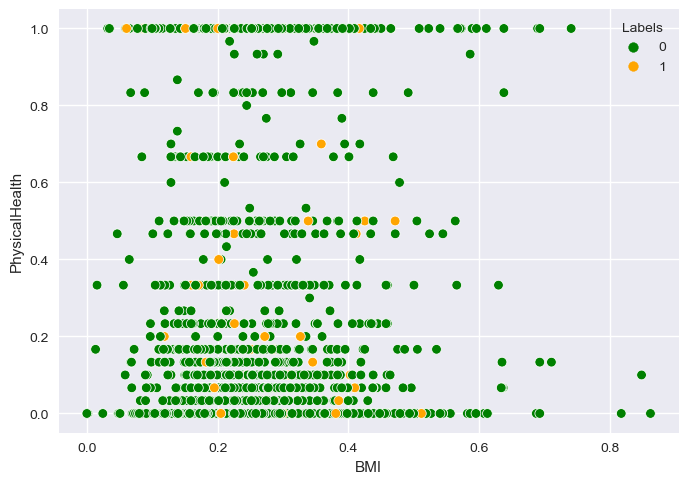

In [63]:
plt.figure()
sns.scatterplot(x='BMI', y='PhysicalHealth', data=dataset_Birch, hue=dataset_Birch['Labels'], palette=['green','orange'])
plt.xlabel('BMI')
plt.ylabel('PhysicalHealth')
plt.show()

In [64]:
classes_dict, acc = accuracy(test_y,labels)
print('Orden de los grupos:', classes_dict)
print('Aciertos:',acc)
print('Porcentaje:',100*acc/test_y.shape[0],'%')

Orden de los grupos: {0: 'No', 1: 'Yes'}
Aciertos: 2890
Porcentaje: 90.36898061288305 %


#### threshold=0.5,branching_factor=70

In [65]:
start_time = time.time()
brc = BIRCH(threshold=0.5,branching_factor=70,n_clusters=2)
brc.fit(train_x)
elapsed_time = time.time() - start_time
print("Tiempo de Ejecución: %.10f segundos." % elapsed_time)

Tiempo de Ejecución: 0.1796615124 segundos.


#### Prueba

In [66]:
labels=brc.predict(test_x)
print(np.unique(labels))

[0 1]


In [67]:
L = pd.DataFrame(labels)
dataset_Birch = pd.concat([L, test_x], axis=1)
dataset_Birch.set_axis(['Labels', 'BMI', 'PhysicalHealth','MentalHealth','AgeCategory','Race','Diabetic','Smoking','AlcoholDrinking','Stroke','DiffWalking','PhysicalActivity'], 
                    axis='columns', inplace=True)
dataset_Birch

C:\Users\gaby9\AppData\Local\Temp\ipykernel_3124\1360341088.py:3: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  dataset_Birch.set_axis(['Labels', 'BMI', 'PhysicalHealth','MentalHealth','AgeCategory','Race','Diabetic','Smoking','AlcoholDrinking','Stroke','DiffWalking','PhysicalActivity'],


,Labels,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,Diabetic,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity
0,0,0.189534,0.000000,0.000000,0.864407,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,0.213075,0.033333,0.033333,0.525424,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0,0.220723,0.000000,0.100000,0.186441,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,0.494077,0.000000,0.000000,0.779661,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0.258210,0.000000,0.000000,0.949153,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3193,0,0.182036,0.000000,0.000000,0.440678,0.6,0.0,1.0,0.0,0.0,0.0,0.0
3194,0,0.225521,0.000000,0.000000,0.186441,0.6,0.0,0.0,0.0,0.0,0.0,1.0
3195,1,0.180087,0.000000,0.000000,0.271186,0.6,0.0,0.0,1.0,0.0,0.0,1.0
3196,0,0.204978,0.000000,0.000000,0.694915,0.6,0.0,0.0,0.0,1.0,0.0,0.0


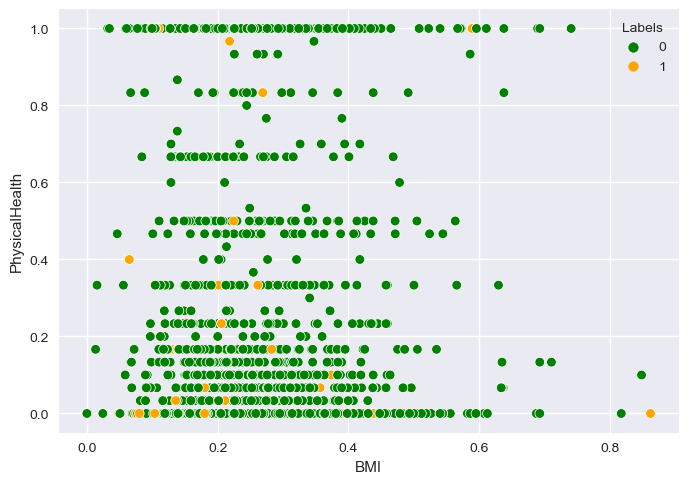

In [68]:
plt.figure()
sns.scatterplot(x='BMI', y='PhysicalHealth', data=dataset_Birch, hue=dataset_Birch['Labels'], palette=['green','orange'])
plt.xlabel('BMI')
plt.ylabel('PhysicalHealth')
plt.show()

In [69]:
classes_dict, acc = accuracy(test_y,labels)
print('Orden de los grupos:', classes_dict)
print('Aciertos:',acc)
print('Porcentaje:',100*acc/test_y.shape[0],'%')

Orden de los grupos: {0: 'No', 1: 'Yes'}
Aciertos: 2724
Porcentaje: 85.17823639774859 %
